In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

Spring Model:
## $\frac{d^2z}{dt^2} + C\frac{dz}{dt} + Kz =0$ 
## $z(0)=2,\ \frac{dz}{dt}(0)=-C $

Forward finite difference: $f'(x) = \frac{f(x+h)-f(x)}{h}$

In [218]:
def analytic_sol(C, K, t):
    return 2*np.exp(-C*t/2)*np.cos(t*np.sqrt(4*K+0j - C**2+0j)/2)

def dz_dC(C, K, t):
#     analytical solution for dz/dC  
    return (C*t*np.exp(-C*t/2)*np.sin(t/2*np.sqrt(4*K+0j - C**2+0j))) / np.sqrt(4*K-C**2) - t*np.exp(-C*t/2)*np.cos(t/2*np.sqrt(4*K+0j - C**2+0j))


def dz_dK(C, K, t):
#     analytical solution for dz/dK  
    return (-2*t*np.sin(t/2*np.sqrt(4*K+0j - C**2+0j))*np.exp(-C*t/2)) / np.sqrt(4*K+0j - C**2+0j)

def fd_dz_dC(C, K, t, delta):
    # forward difference dz/dC
    z_plus_c = 2*np.exp(-(C+delta)*t/2)*np.cos(t*np.sqrt(4*K+0j - (C+delta)**2+0j)/2)
    z = analytic_sol(C, K, t)
    delta_z = (z_plus_c - z)/delta 
    return delta_z

def fd_dz_dK(C, K, t, delta):
    # forward difference dz/dC
    z_plus_K = 2*np.exp(-C*t/2)*np.cos(t*np.sqrt(4*(K+delta)+0j - C**2+0j)/2)
    z = analytic_sol(C, K, t)
    delta_z = (z_plus_K - z)/delta 
    return delta_z

def cs_dz_dC(C, K, t, delta):
    # complex step difference dz/dC
    z_plus_c = np.imag(2*np.exp(-(C+1j*delta)*t/2)*np.cos(t*np.sqrt(4*K+0j - (C+1j*delta)**2+0j)/2))
    delta_z = z_plus_c/delta 
    return delta_z

def cs_dz_dK(C, K, t, delta):
    # complex step difference dz/dK
    z_plus_K = np.imag(2*np.exp(-C*t/2)*np.cos(t*np.sqrt(4*(K+1j*delta) - C**2+0j)/2))
    delta_z = z_plus_K/delta 
    return delta_z

In [219]:
stepsize = 10e-6
t_array = np.linspace(0,100,1001)
C_array = np.arange(0,100, 1001)

nominal_C=0.2
nominal_K=3

c_sens = np.real(dz_dC(nominal_C, nominal_K, t_array))
k_sens = np.real(dz_dK(nominal_C, nominal_K, t_array))

c_sens_fd = np.real(fd_dz_dC(nominal_C, nominal_K, t_array, stepsize))
k_sens_fd = np.real(fd_dz_dK(nominal_C, nominal_K, t_array, stepsize))

c_sens_cs = cs_dz_dC(nominal_C, nominal_K, t_array, stepsize)
k_sens_cs = cs_dz_dK(nominal_C, nominal_K, t_array, stepsize)

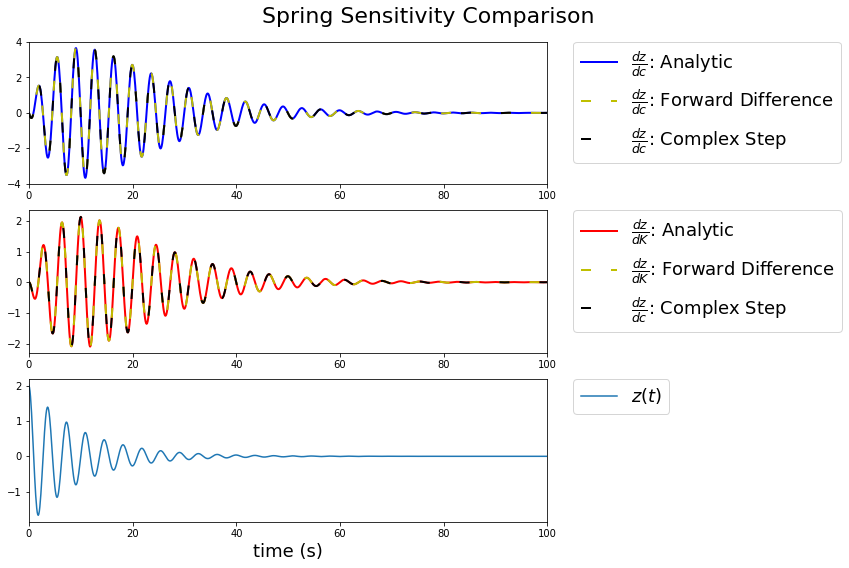

In [225]:
# plots
SMALL_SIZE = 10
MEDIUM_SIZE = 18
BIGGER_SIZE = 22
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(12, 8))

axes[0].plot(t_array, c_sens, label=r'$\frac{dz}{dc}$: Analytic', c='b', linewidth=2)
axes[0].plot(t_array, c_sens_fd, label=r'$\frac{dz}{dc}$: Forward Difference', linestyle ='--',dashes=(5, 10), c='y', linewidth=2)
axes[0].plot(t_array, c_sens_cs, label=r'$\frac{dz}{dc}$: Complex Step', linestyle ='--',dashes=(5, 15), c='k', linewidth=2)
axes[0].set_xlim(0, 100);
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

axes[1].plot(t_array, k_sens, label=r'$\frac{dz}{dK}$: Analytic',c='r', linewidth=2)
axes[1].plot(t_array, k_sens_fd, label=r'$\frac{dz}{dK}$: Forward Difference', linestyle='--',dashes=(5, 10), c='y', linewidth=2)
axes[1].plot(t_array, k_sens_cs, label=r'$\frac{dz}{dc}$: Complex Step', linestyle ='--',dashes=(5, 15), c='k', linewidth=2)
axes[1].set_xlim(0, 100);
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

axes[2].plot(t_array,np.real(analytic_sol(nominal_C, nominal_K,t_array)), label=r'$z(t)$')
axes[2].set_xlim(0, 100);
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

plt.xlabel('time (s)');
plt.suptitle('Spring Sensitivity Comparison');
plt.tight_layout();
fig.subplots_adjust(top=0.92)
plt.savefig('Spring_Sensitivity_Comparison.png')

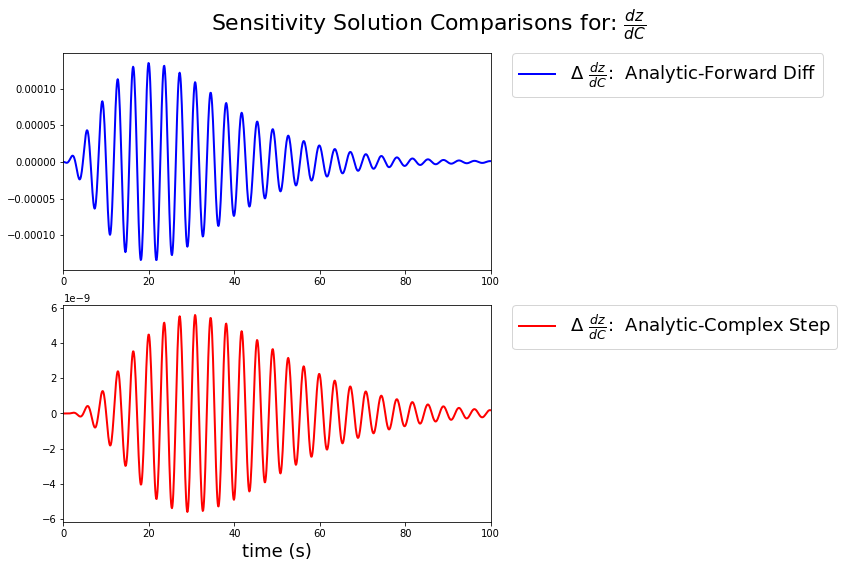

In [228]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(12, 8))
axes[0].plot(t_array, c_sens-c_sens_fd, label=r'$\Delta \ \frac{dz}{dC}$:  Analytic-Forward Diff' , c='b',linewidth=2)
axes[0].set_xlim(0, 100);
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);


axes[1].plot(t_array, c_sens-c_sens_cs, label=r'$\Delta \ \frac{dz}{dC}$:  Analytic-Complex Step', c='r',linewidth=2)
axes[1].set_xlim(0, 100);
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

plt.xlabel('time (s)');
plt.suptitle(r'Sensitivity Solution Comparisons for: $\frac{dz}{dC}$');
plt.tight_layout();
fig.subplots_adjust(top=0.90)
plt.savefig('Solution_comparison_dzdC.png')

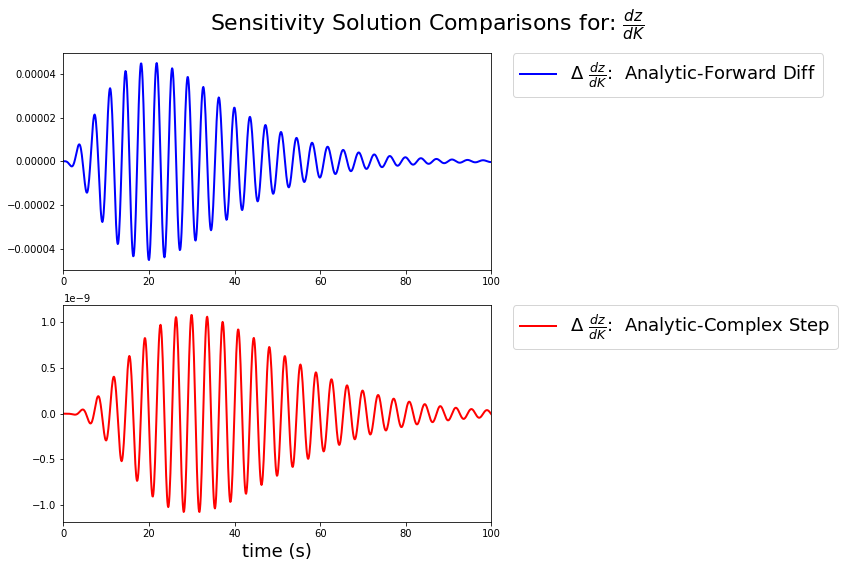

In [229]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(12, 8))
axes[0].plot(t_array, k_sens-k_sens_fd, label=r'$\Delta \ \frac{dz}{dK}$:  Analytic-Forward Diff' , c='b',linewidth=2)
axes[0].set_xlim(0, 100);
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);


axes[1].plot(t_array, k_sens-k_sens_cs, label=r'$\Delta \ \frac{dz}{dK}$:  Analytic-Complex Step', c='r',linewidth=2)
axes[1].set_xlim(0, 100);
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

plt.xlabel('time (s)');
plt.suptitle(r'Sensitivity Solution Comparisons for: $\frac{dz}{dK}$');
plt.tight_layout();
fig.subplots_adjust(top=0.90)
plt.savefig('Solution_comparison_dzdK.png')